<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-15-web_scraping%20/web_scraping2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time

##Look carefully at the URL on page 1. Try moving to page 2. In a python notebook, try to automatically generate the URLs of the first 5 pages.

##Use BeautifulSoup to scrape the facts/jokes and ratings from the first 5 pages, thanks to the URLs you have generated (We could do the next 100 or 200 pages, but that might cause an unnecessary load for those who administer this server.) The result should be in a dictionary.

In [ ]:
pages = range(1,6)
joke_dict = {}

for page in pages:

  navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
  url = f"https://chucknorrisfacts.net/facts.php?page={page}"
  r = requests.get(url, headers={'User-Agent': navigator})

  soup = BeautifulSoup(r.content, 'html.parser')
  content = soup.find(id='content')
  jokes = content.find_all('p')
  ratings = content.find_all(class_='rated_text')

  for i in range(len(jokes)):
    joke_dict[jokes[i].get_text()] = ratings[i].get_text()
  
  time.sleep(3)

In [ ]:
print(len(joke_dict))
list(joke_dict.items())[0]

100


("There is no 'ctrl' button on Chuck Norris' computer. Chuck Norris is always in control.",
 'Rated 3.73/5 (1024 Votes)')

##Create a DataFrame containing this data, so it must have 2 columns and 100 rows.

In [ ]:
df_jokes = pd.DataFrame(joke_dict.items(), columns=['Joke', 'Rating'])
df_jokes.tail()

,Joke,Rating
95,"While urinating, Chuck Norris is easily capabl...",Rated 3.44/5 (177 Votes)
96,Chuck Norris once sued the Houghton-Mifflin te...,Rated 3.16/5 (152 Votes)
97,"When Chuck Norris talks, everybody listens. An...",Rated 2.65/5 (175 Votes)
98,"When Steven Seagal kills a ninja, he only take...",Rated 2.84/5 (144 Votes)
99,Chuck Norris doesnt shave; he kicks himself in...,Rated 3.5/5 (191 Votes)


In [ ]:
df_jokes['Rating_numeric'] = df_jokes['Rating'].apply(lambda x: x.split()[1].replace('/5', '')).astype('float')

In [ ]:
df_jokes.tail()

,Joke,Rating,Rating_numeric
95,"While urinating, Chuck Norris is easily capabl...",Rated 3.44/5 (177 Votes),3.44
96,Chuck Norris once sued the Houghton-Mifflin te...,Rated 3.16/5 (152 Votes),3.16
97,"When Chuck Norris talks, everybody listens. An...",Rated 2.65/5 (175 Votes),2.65
98,"When Steven Seagal kills a ninja, he only take...",Rated 2.84/5 (144 Votes),2.84
99,Chuck Norris doesnt shave; he kicks himself in...,Rated 3.5/5 (191 Votes),3.50


##Creates a visualization of the distribution of the notes.

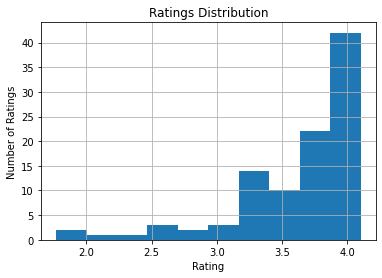

In [ ]:
df_jokes['Rating_numeric'].hist()
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()